# Practice of Image Filtering
We clone the github repository into the virtual directory. It makes you to access your image dataset in the colabotory.

In [ ]:
! git clone https://github.com/soonkijung/cv-datasets

fatal: destination path 'cv-datasets' already exists and is not an empty directory.


In [ ]:
! ls

cv-datasets  sample_data


In [ ]:
import numpy as np
from scipy import signal # https://scipy.org/
from skimage import io # https://scikit-image.org/
from matplotlib import pyplot as plt

## Correlation and Convolution

### 2d correlation
\begin{equation}
h [m, n] = \sum_{k,l} f [k, l] I [m+k, n+l] \qquad (1)
\end{equation}
The equation $(1)$ can be easily implemented by 

<center> <code>
        h = scipy.signal.correlate2d(I, f)
</code> </center>

### 2d convolution
\begin{equation*}
h [m, n] = \sum_{k,l} f [k, l] I [m-k, n-l] \qquad (2)
\end{equation*}
It can be easily implemented by
<center> <code>
h = scipy.signal.convolve2d(I, f)
</code> </center>

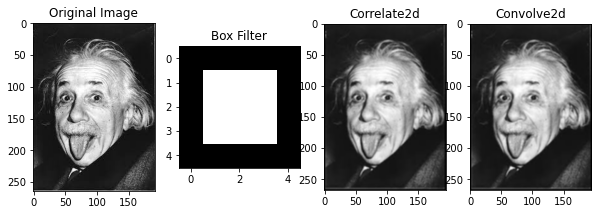

In [ ]:
img = io.imread('/content/cv-datasets/einstein.jpeg')[:,:,0]
fig, axs = plt.subplots(1,4,figsize=(10,5))
axs[0].set_title('Original Image')
axs[0].imshow(img, cmap='gray')

#f = np.array([[1/9, 1/9, 1/9],
#             [1/9, 1/9, 1/9],
#             [1/9, 1/9, 1/9]])
f = np.array([[0, 0, 0, 0, 0],
              [0, 1/9, 1/9, 1/9, 0],
              [0, 1/9, 1/9, 1/9, 0],
              [0, 1/9, 1/9, 1/9, 0],
              [0, 0, 0, 0, 0]])

axs[1].set_title('Box Filter')
axs[1].imshow(f, cmap='gray')

h1 = signal.correlate2d(img, f)
axs[2].set_title('Correlate2d')
axs[2].imshow(h1, cmap='gray')

h2 = signal.convolve2d(img, f)
axs[3].set_title('Convolve2d')
axs[3].imshow(h2, cmap='gray')

## Correlation vs. convolution

Why the result is flipped when the parameter order is changed as followings:
```
h = scipy.signal.correlate2d(f, I)
```

It can be derived by switching `f` and `I` in the equation (1):

\begin{equation*}
h [m, n] = \sum_{k,l} I [k, l] f [m+k, n+l]
\end{equation*}

The above equation is written as

$$
\begin{aligned}
h [m, n] & = \sum_{k,l} f [m+k, n+l] I [k, l] \\
         & = \sum_{i,j} f [i, j] I [i-m, j-n] \qquad{(3)}
\end{aligned}
$$

As you can see the equation (3), the index of `I[x, y]` is reversed from the equation (1). As the result, the correlation result is flipped on the x and y axes.

Theoretically, convolution are linear operations on the signal or signal modifiers, whereas correlation is a measure of similarity between two signals. As you rightly mentioned, the basic difference between convolution and correlation is that the convolution process rotates the matrix by 180 degrees. Correlation and convolution are identical when the filter kernel is symmetric.

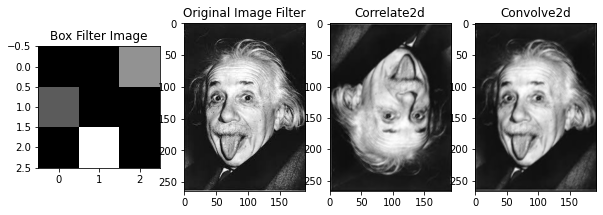

In [ ]:
img = io.imread('/content/cv-datasets/einstein.jpeg')[:,:,0]
fig, axs = plt.subplots(1,4,figsize=(10,5))
f = np.array([[1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9]])

axs[0].set_title('Box Filter Image')
axs[0].imshow(f, cmap='gray')


axs[1].set_title('Original Image Filter')
axs[1].imshow(img, cmap='gray')

h1 = signal.correlate2d(f, img)
axs[2].set_title('Correlate2d')
axs[2].imshow(h1, cmap='gray')

h2 = signal.convolve2d(f, img)
axs[3].set_title('Convolve2d')
axs[3].imshow(h2, cmap='gray')

## Image Sharpening

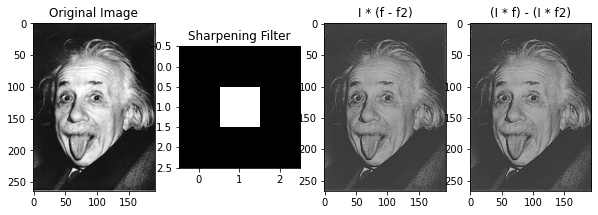

In [ ]:
img = io.imread('/content/cv-datasets/einstein.jpeg')[:,:,0]
fig, axs = plt.subplots(1,4,figsize=(10,5))

f = np.array([[1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9]])

f2 = np.array([[0, 0, 0],
             [0, 2, 0],
             [0, 0, 0]])
h1 = signal.convolve2d(img, f)
h2 = signal.convolve2d(img, f2)

f3 = f2 - f # sharpening filter: 센터의 필터값에서 주의의 필터값의 차이가 클 경우에 큰 값을 얻으므로 이를 "선명 효과 필터"라고 한다.
h3 = signal.convolve2d(img, f3)

h4 = h2 - h1

axs[0].set_title('Original Image')
axs[0].imshow(img, cmap='gray')
axs[1].set_title('Sharpening Filter')
axs[1].imshow(f3, cmap='gray')
axs[2].set_title('I * (f - f2)') # 각각 컨볼루션하고 이미지를 서로 뺀것
axs[2].imshow(h3, cmap='gray')
axs[3].set_title('(I * f) - (I * f2)') # 필터끼리 빼고 이미지를 컨볼루션 -> shapening image
axs[3].imshow(h4, cmap='gray') # 선형적이라 같은 결과

## Gaussian Filter

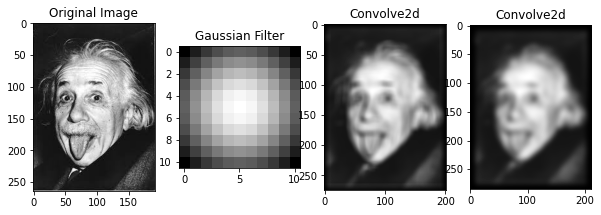

In [ ]:
img = io.imread('/content/cv-datasets/einstein.jpeg')[:,:,0]
fig, axs = plt.subplots(1,4,figsize=(10,5))
axs[0].set_title('Original Image')
axs[0].imshow(img, cmap='gray')

# 멀리 있을수록 가중치를 작게둔다.
x, y = np.meshgrid(np.linspace(-1,1,11), np.linspace(-1,1,11))
d = np.sqrt(x*x + y*y)
sigma, mu = 1.0, 0.0
g = np.exp(-((d-mu)**2/(2.0*sigma**2))) # Gaussian Filter 식 적용 (식에 시그마라는게 쓰임)

axs[1].set_title('Gaussian Filter')
axs[1].imshow(g, cmap='gray')

h1 = signal.convolve2d(img, g)
axs[2].set_title('Convolve2d')
axs[2].imshow(h1, cmap='gray')

h2 = signal.convolve2d(h1, g) 
axs[3].set_title('Convolve2d')
axs[3].imshow(h2, cmap='gray')


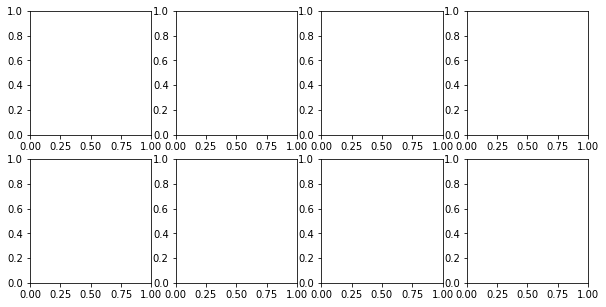

In [ ]:
img = io.imread('/content/cv-datasets/einstein.jpeg')[:,:,0]
fig, axs = plt.subplots(2,4,figsize=(10,5))

x, y = np.meshgrid(np.linspace(-4,4,41), np.linspace(-4,4,41))
d = np.sqrt(x*x + y*y)
sigma, mu = 1.0, 0.0
g = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-((d-mu)**2/(2.0*sigma**2)))

In [ ]:
g

array([[4.48950392e-08, 9.79372829e-08, 2.05270229e-07, ...,
        2.05270229e-07, 9.79372829e-08, 4.48950392e-08],
       [9.79372829e-08, 2.13647466e-07, 4.47791313e-07, ...,
        4.47791313e-07, 2.13647466e-07, 9.79372829e-08],
       [2.05270229e-07, 4.47791313e-07, 9.38541715e-07, ...,
        9.38541715e-07, 4.47791313e-07, 2.05270229e-07],
       ...,
       [2.05270229e-07, 4.47791313e-07, 9.38541715e-07, ...,
        9.38541715e-07, 4.47791313e-07, 2.05270229e-07],
       [9.79372829e-08, 2.13647466e-07, 4.47791313e-07, ...,
        4.47791313e-07, 2.13647466e-07, 9.79372829e-08],
       [4.48950392e-08, 9.79372829e-08, 2.05270229e-07, ...,
        2.05270229e-07, 9.79372829e-08, 4.48950392e-08]])

In [ ]:
print(np.sum(g[:,:]))

62.66067935138253


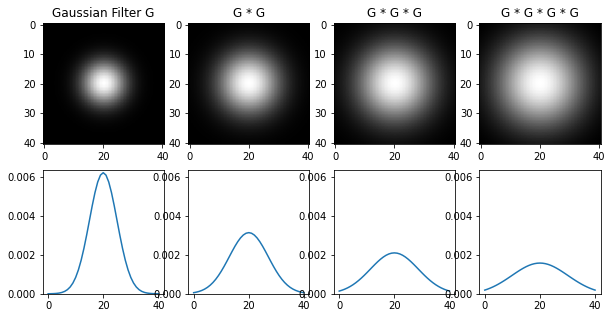

In [ ]:
img = io.imread('/content/cv-datasets/einstein.jpeg')[:,:,0]
fig, axs = plt.subplots(2,4,figsize=(10,5))

x, y = np.meshgrid(np.linspace(-4,4,41), np.linspace(-4,4,41))
d = np.sqrt(x*x + y*y)
sigma, mu = 1.0, 0.0
g = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-((d-mu)**2/(2.0*sigma**2)))
g = g / np.sum(g[:,:])
mode = np.max(g[:,:])

axs[0,0].set_title('Gaussian Filter G')
axs[0,0].imshow(g, cmap='gray')
axs[1,0].set_ylim([0,mode])
axs[1,0].plot(g[21,:])

h1 = signal.convolve2d(g, g, 'same')
axs[0,1].set_title('G * G')
axs[0,1].imshow(h1, cmap='gray')
axs[1,1].set_ylim([0,mode])
axs[1,1].plot(h1[21,:])

h2 = signal.convolve2d(h1, g, 'same')
axs[0,2].set_title('G * G * G')
axs[0,2].imshow(h2, cmap='gray')
axs[1,2].set_ylim([0,mode])
axs[1,2].plot(h2[21,:])

h3 = signal.convolve2d(h2, g, 'same')
axs[0,3].set_title('G * G * G * G')
axs[0,3].imshow(h3, cmap='gray')
axs[1,3].set_ylim([0,mode])
axs[1,3].plot(h3[21,:])


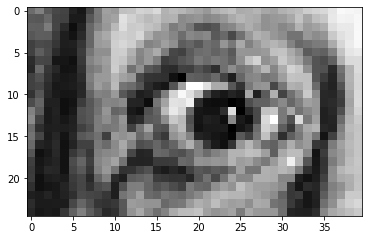

In [ ]:
import skimage

D = skimage.img_as_float(img)
f = D[105:130, 30:70]
plt.imshow(f, cmap='gray')
plt.show()

Text(69, 57.400009165705356, '(69, 57)')

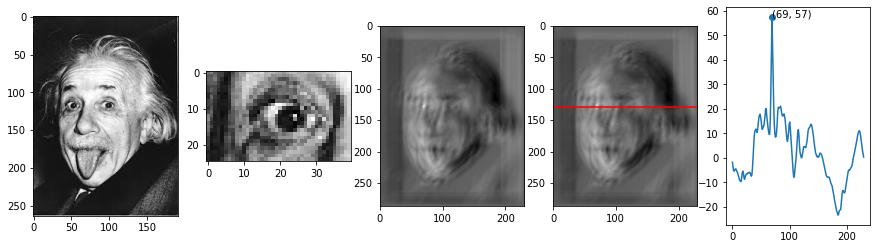

In [ ]:
f2 = f - np.mean(f)
D2 = D - np.mean(D)
I2 = signal.correlate2d(D2, f2)

fig, axs = plt.subplots(1,5,figsize=(15,4))
axs[0].imshow(D, cmap='gray')
axs[1].imshow(f, cmap='gray')
axs[2].imshow(I2, cmap='gray')
mloc = np.argmax(I2)
py = mloc // I2.shape[1]
px = mloc % I2.shape[1]
axs[3].imshow(I2, cmap='gray')
axs[3].plot([0, I2.shape[1]-1], [py, py], color='red')
axs[4].plot(I2[py,:])
axs[4].scatter(px, I2[py, px])
axs[4].text(px, I2[py, px], '(%d, %d)' % (px, I2[py, px]))

In [ ]:
print(mloc)
py = mloc // I2.shape[1]
px = mloc % I2.shape[1]
print(px, py)
print(py*I2.shape[1] + px)

29739
69 129
29739


### 2d convolution
\begin{equation*}
h [m, n] = \sum_{k,l} f [k, l] I [m-k, n-l]
\end{equation*}

In [ ]:
def myConvolution(image, filter, padding=0):
    # Cross Correlation
    filter = np.flipud(np.fliplr(filter))

    # Gather Shapes of Filter, Image, Padding
    xFilterShape = filter.shape[0]
    yFilterShape = filter.shape[1]
    xImageShape = image.shape[0]
    yImageShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = xImageShape - xFilterShape + 2 * padding + 1
    yOutput = yImageShape - yFilterShape + 2 * padding + 1
    output = np.zeros((xOutput, yOutput)) # 0으로 가득찬 matrix를 생성

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[padding:-padding, padding:-padding] = image
    else:
        imagePadded = image


    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > imagePadded.shape[1] - yFilterShape:
            break
        for x in range(image.shape[0]):
            # Go to next row once filter is out of bounds
            if x > imagePadded.shape[0] - xFilterShape:
                break
            try:
                output[x, y] = (filter * imagePadded[x: x +xFilterShape, y: y+yFilterShape]).sum()
            except:
                break
    return output

In [ ]:
img2 = myConvolution(img, g, padding=g.shape[0]//2) # g는 가우시안

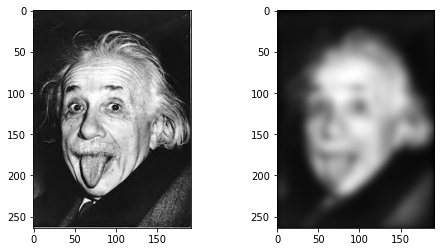

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(img2, cmap='gray')

In [ ]:
print(img.shape)
print(g.shape)
print(img2.shape)

(264, 191)
(41, 41)
(264, 191)


### Median Filter

In [136]:
def myMedianFilter(image, filter, windowsize,padding=0):
    # Cross Correlation
    filter = np.flipud(np.fliplr(filter))

    # Gather Shapes of Filter, Image, Padding
    xFilterShape = filter.shape[0]
    yFilterShape = filter.shape[1]
    xImageShape = image.shape[0]
    yImageShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = xImageShape - xFilterShape + 2 * padding + 1
    yOutput = yImageShape - yFilterShape + 2 * padding + 1
    output = np.zeros((xOutput, yOutput)) # 0으로 가득찬 matrix를 생성

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[padding:-padding, padding:-padding] = image
    else:
        imagePadded = image


    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > imagePadded.shape[1] - yFilterShape:
            break
        for x in range(image.shape[0]):
            # Go to next row once filter is out of bounds
            if x > imagePadded.shape[0] - xFilterShape:
                break
            try:
                test = imagePadded[x: x +xFilterShape, y: y+yFilterShape];
                medianNum = np.median(test.reshape(-1)); # 중앙값을 구함
                output[x,y] = medianNum;
            except:
                break
    return output

In [137]:
img2 = myMedianFilter(img, g, g.shape[0],padding=g.shape[0]//2) # g는 가우시안

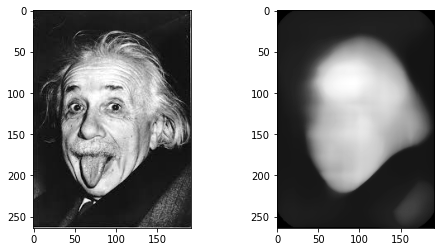

In [138]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(img2, cmap='gray')

In [129]:
print(img.shape)
print(g.shape)
print(img2.shape)

(264, 191)
(41, 41)
(264, 191)
